In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install livelossplot


     |████████████████████████████████| 793 kB 7.4 MB/s 
     |████████████████████████████████| 381 kB 41.4 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.


In [ ]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [ ]:
import sys
import os, zipfile

#Unzipping the dataset
zip_ref = zipfile.ZipFile("/content/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()


In [ ]:
train_dataset_path ='/content/Dataset/train_set/images'
train_labels_path='/content/Dataset/train_set/annotations'

In [ ]:
def Dataprep(imagespath, labelspath, savef):
  imagespath = imagespath
  labelspath = labelspath
  savef = savef

  Ind=[]
  i=0
  for dirname, _, filenames in os.walk(imagespath):
      for filename in filenames:
          Ind.insert(1,os.path.join(dirname, filename))
          i=i+1
  Image={"Image":Ind}
  dfx = pd.DataFrame(Image) 
  dfx
  
  Val=[]
  Exp=[]
  Aro=[]
  LM=[]
  # creating list for val, exp, aro, and lm
  for cls_pth in glob.glob(labelspath+'/*'):
    a=cls_pth
    if (a.split('/')[-1]).endswith('_val.npy'):
      b=np.load(a)
      b=np.asarray(b).astype(np.float32) 
      Val.append(b)
    elif(a.split('/')[-1]).endswith('_exp.npy'):
      ex=np.load(a)
      ex=np.asarray(ex).astype(np.float32)
      Exp.append(ex)
    elif(a.split('/')[-1]).endswith('_aro.npy'):
      ar=np.load(a)
      ar=np.asarray(ar).astype(np.float32)
      Aro.append(ar)
    elif(a.split('/')[-1]).endswith('_lnd.npy'):
      lam=ar=np.load(a)
      #
      lam=np.reshape(lam, (68,2), order='C')
      lam=np.asarray(lam).astype(np.float32)
      LM.append(lam)
    i=i+1

  print(Val[0])
  print(Exp[0])
  print(Aro[0])
  print(LM[0])
  label1={"Expression":Exp}
  label2={"Valance":Val}
  label3={"Arosual":Aro}
  Landmark={"Landmarks":LM}
  dflm= pd.DataFrame(Landmark) 
  dfy1 = pd.DataFrame(label1) 
  dfy1['Expression'] = dfy1['Expression'].astype(float, errors = 'raise')
  dfy2 = pd.DataFrame(label2)
  dfy2['Valance'] = dfy2['Valance'].astype(float, errors = 'raise')
  dfy3 = pd.DataFrame(label3)
  dfy3['Arosual'] = dfy3['Arosual'].astype(float, errors = 'raise')
  dfall= pd.concat([dfx,dflm, dfy1,dfy2,dfy3], axis=1)
  dfall.to_csv (r'{}.csv'.format(savef), index = True, header=True)
  #dfall.to_csv('file1.csv')
  return dfall

In [ ]:
# for train dataset
savef = "file01"
dfall = Dataprep(train_dataset_path, train_labels_path, savef)

-0.324235
1.0
0.236703
[[  4.7799654  83.59451  ]
 [  3.5645218 109.32415  ]
 [  5.711026  136.75789  ]
 [ 13.178991  164.60606  ]
 [ 26.474852  188.53513  ]
 [ 44.92466   208.3593   ]
 [ 67.22337   224.02858  ]
 [ 94.33321   235.27145  ]
 [120.74574   235.16785  ]
 [148.61523   228.0227   ]
 [169.65176   211.76396  ]
 [186.11868   191.13953  ]
 [198.39388   167.94641  ]
 [205.35152   143.41002  ]
 [206.89029   117.26597  ]
 [203.81273    92.333015 ]
 [200.75464    70.361725 ]
 [ 23.33106    69.12204  ]
 [ 35.949078   56.271515 ]
 [ 54.371616   52.07732  ]
 [ 73.90442    52.677513 ]
 [ 91.46212    58.89378  ]
 [127.7696     55.66775  ]
 [143.64438    47.743797 ]
 [160.58267    44.089058 ]
 [178.33516    45.200127 ]
 [190.1273     55.849953 ]
 [112.802505   79.2074   ]
 [114.7776     96.548645 ]
 [116.69037   113.318275 ]
 [118.37328   131.23471  ]
 [ 90.725845  138.75853  ]
 [104.25155   142.95273  ]
 [118.19798   146.38597  ]
 [130.65239   140.97353  ]
 [141.2096    135.46463  ]
 [ 48

In [ ]:
dfall

Image  \
0     /content/Dataset/train_set/images/4548.jpg   
1     /content/Dataset/train_set/images/3871.jpg   
2      /content/Dataset/train_set/images/207.jpg   
3     /content/Dataset/train_set/images/2867.jpg   
4      /content/Dataset/train_set/images/271.jpg   
...                                          ...   
3480  /content/Dataset/train_set/images/1766.jpg   
3481  /content/Dataset/train_set/images/3674.jpg   
3482  /content/Dataset/train_set/images/2265.jpg   
3483  /content/Dataset/train_set/images/3452.jpg   
3484  /content/Dataset/train_set/images/2478.jpg   

                                              Landmarks  Expression   Valance  \
0     [[4.7799654, 83.59451], [3.5645218, 109.32415]...         1.0 -0.324235   
1     [[14.84, 82.34126], [14.0, 105.30836], [14.540...         0.0 -0.508069   
2     [[19.778814, 81.5196], [21.556252, 107.02802],...         1.0  0.281479   
3     [[24.626938, 95.25276], [27.487347, 117.99946]...         6.0  0.000000   
4     [[49.30654, 96.74615], [49.481705, 115.40917],...         1.0 -0.149795   
...                                                 ...         ...       ...   
3480  [[16.001768, 100.25295], [15.172597, 121.20185...         3.0  0.841097   
3481  [[21.052567, 76.33111], [20.589119, 99.78111],...         2.0 -0.830654   
3482  [[16.702, 56.9973], [16.516, 85.43018], [18.44...         1.0 -0.430701   
3483  [[-17.954226, 82.444084], [-17.46139, 112.2334...         0.0  0.198413   
3484  [[0.09739131, 79.742065], [2.8135266, 105.5793...         1.0  0.004313   

       Arosual  
0     0.236703  
1    -0.301587  
2     0.115887  
3     0.817460  
4    -0.182540  
...        ...  
3480  0.115887  
3481  0.198413  
3482  0.100084  
3483  0.111305  
3484 -0.047408  

[3485 rows x 5 columns]

In [ ]:
# Giving the dir path to test set
test_dataset_path ='/content/Dataset/val_set/images'
test_labels_path='/content/Dataset/val_set/annotations'

In [ ]:
# for test dataset
savef = "file02"
tfall = Dataprep(test_dataset_path, test_labels_path, savef)

-0.873016
7.0
0.542328
[[ 21.359701  98.76112 ]
 [ 25.957153 120.15155 ]
 [ 33.07146  142.8276  ]
 [ 42.484493 163.87492 ]
 [ 53.562847 184.40169 ]
 [ 70.635506 200.27493 ]
 [ 91.953255 212.72507 ]
 [114.41618  221.71268 ]
 [136.52255  222.18987 ]
 [157.62637  216.65295 ]
 [178.52464  203.13803 ]
 [198.17288  187.59605 ]
 [213.8361   166.42253 ]
 [220.9672   142.47662 ]
 [221.93617  117.418594]
 [221.46217   90.22704 ]
 [219.57034   63.36676 ]
 [ 32.081497  79.47268 ]
 [ 41.922398  67.15268 ]
 [ 58.676254  64.778595]
 [ 76.0761    66.23775 ]
 [ 91.98682   70.50479 ]
 [117.52869   64.60902 ]
 [135.05019   55.219154]
 [153.67491   49.638874]
 [172.78622   50.44338 ]
 [189.63655   57.707607]
 [106.211235  82.26084 ]
 [108.090485  98.481125]
 [109.843895 114.75268 ]
 [111.81123  131.40675 ]
 [ 96.189964 142.3583  ]
 [106.50487  145.21352 ]
 [116.194756 146.37296 ]
 [125.649734 142.13747 ]
 [134.46292  137.74423 ]
 [ 51.33543   89.20169 ]
 [ 60.91206   81.85859 ]
 [ 74.318504  80.88451 ]
 [

In [ ]:
tfall

Image  \
0    /content/Dataset/val_set/images/135.jpg   
1    /content/Dataset/val_set/images/207.jpg   
2    /content/Dataset/val_set/images/452.jpg   
3    /content/Dataset/val_set/images/203.jpg   
4    /content/Dataset/val_set/images/357.jpg   
..                                       ...   
351   /content/Dataset/val_set/images/52.jpg   
352  /content/Dataset/val_set/images/146.jpg   
353  /content/Dataset/val_set/images/120.jpg   
354   /content/Dataset/val_set/images/23.jpg   
355  /content/Dataset/val_set/images/162.jpg   

                                             Landmarks  Expression   Valance  \
0    [[21.359701, 98.76112], [25.957153, 120.15155]...         7.0 -0.873016   
1    [[-13.187436, 95.01428], [-12.7183895, 119.362...         4.0  0.096787   
2    [[7.7019176, 83.60752], [6.3415527, 106.85949]...         2.0 -0.543478   
3    [[21.982222, 104.10064], [26.382223, 125.76453...         1.0 -0.300253   
4    [[26.339699, 91.77246], [23.469347, 119.91316]...         2.0 -0.880952   
..                                                 ...         ...       ...   
351  [[-3.9593513, 100.72983], [2.6062703, 123.8175...         5.0  0.498451   
352  [[2.2141538, 128.92728], [13.465846, 152.47273...         1.0 -0.071429   
353  [[8.126087, 93.949974], [11.6504345, 120.88908...         4.0 -0.531058   
354  [[14.038812, 96.80643], [16.083643, 119.59474]...         5.0 -0.096787   
355  [[5.8036366, 76.895], [7.5981817, 100.07667], ...         1.0  0.067751   

      Arosual  
0    0.542328  
1    0.421022  
2    0.483933  
3    0.079365  
4    0.849105  
..        ...  
351  0.024197  
352 -0.159394  
353  0.634921  
354  0.658149  
355  0.715817  

[356 rows x 5 columns]

In [ ]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# Image processing
import imageio
import cv2
import skimage.transform
#from skimage.transform import rescale, resize, downscale_local_mean
# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
#from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

#############################################
# Settings
#############################################
import os
# Any results you write to the current directory are saved as output.

# Settings
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')

# toy=True - development mode, small samples, limited training, fast run
# toy=False - full data, slow learning and run
toy=False

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 141 kB 5.6 MB/s 
     |████████████████████████████████| 462 kB 44.3 MB/s 


##**Landmarks In images**

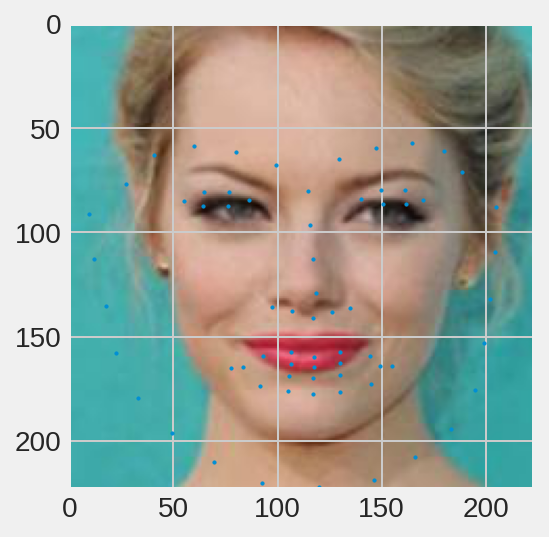

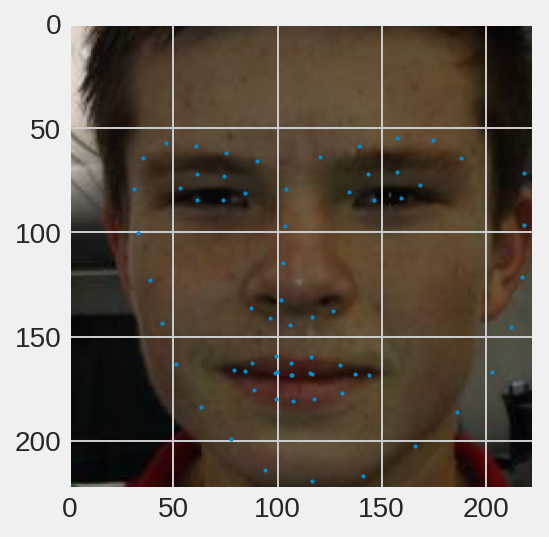

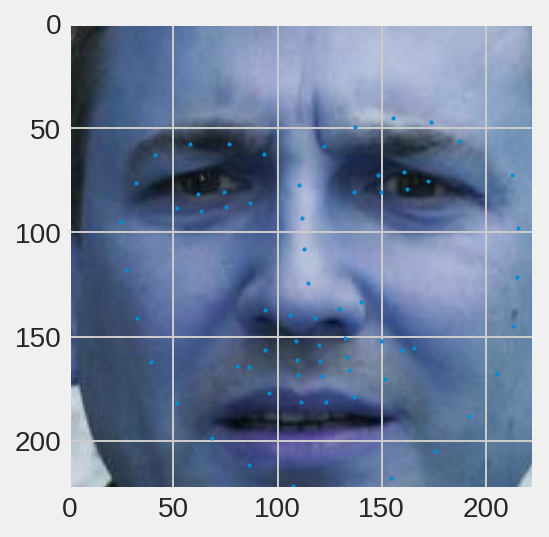

In [ ]:
landmarks_frame = dfall.Landmarks

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.')
    plt.pause(0.001)

plt.figure()
show_landmarks(io.imread(dfall.Image[11]), dfall.Landmarks[11])
show_landmarks(io.imread(dfall.Image[7]), dfall.Landmarks[7])
show_landmarks(cv2.imread(dfall.Image[3]), dfall.Landmarks[3])
plt.show()

##**Data Augmentation**

In [ ]:
class Generators:
    def __init__(self, train_df, test_df, dirt, dirs):
        self.batch_size=64
        self.img_size=(224,224)
        _datagen=ImageDataGenerator(rescale=1./255.)
        _datagen = ImageDataGenerator(
            rescale=None,
            validation_split=0.25,
            featurewise_center=False,
            featurewise_std_normalization=True,
            rotation_range=90,
            width_shift_range=0.2,            
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            dtype=float
            )
        # Train generator
        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=dirt,
            x_col=np.asarray("Image"),
            y_col=['Expression','Valance','Arosual'],
            image_size=(224,224),
            has_ext=False,
            subset="training",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",            
            target_size=self.img_size)
        print('Train generator created')
        # Validation generator
        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=dirt,    
            x_col="Image",
            y_col=['Expression','Valance','Arosual'],
            has_ext=False,
            subset="validation",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",
            target_size=self.img_size)    
        print('Validation generator created')
        # Test generator
        test_datagen=ImageDataGenerator(rescale=1./255.)
        self.test_generator =test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=dirs,
            x_col=np.asarray("Image"),
            y_col=['Expression','Valance','Arosual'],
            image_size=(224,224),
            has_ext=False,
            #subset="validation",
            batch_size=self.batch_size,
            seed=42,
            shuffle=False,
            #class_mode="multi_output", 
            class_mode = None,           
            target_size=self.img_size)
        print('Test Generator created')           

In [ ]:
# Create generators        
generators = Generators(dfall,tfall, train_dataset_path, test_dataset_path)  

Found 2614 validated image filenames.
Train generator created
Found 871 validated image filenames.
Validation generator created
Found 356 validated image filenames.
Test Generator created


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)


##**For Baseline Models**

In [ ]:
#from livelossplot import PlotLossesKerasTF
class ModelTrainer:
    """
    Create and fit the model
    """
    
    def __init__(self, generators):
        self.generators = generators
        self.img_width = generators.img_size[0]
        self.img_height = generators.img_size[1]
        
    def create_model(self, base_model):

      visible = Input(shape=(224,224,3))
      x= base_model(visible, training=True)
      flat = GlobalAveragePooling2D()(x)
      hidden1 = Dense(2048, activation='relu')(flat)
      hidden1 = Dense(1024, activation='relu')(hidden1)

      expression = Dense(8, name='expression')(hidden1)
      valence = Dense(1, activation='linear', name='valence')(hidden1)
      arrousal = Dense(1, activation='linear', name='arrousal')(hidden1)

      model = Model(inputs=visible, outputs=[expression,valence,arrousal])
      model.compile(optimizer=Adam(learning_rate=0.0001), 
                    loss=[SparseCategoricalCrossentropy(from_logits=True), MeanSquaredError(), MeanSquaredError()], 
                    loss_weights={'expression': 5, 'valence': 0.25, 'arrousal':0.25},
                    metrics={
                        #'sparse_categorical_accuracy':'SparseCategoricalCrossentropy()',#
                             'expression':'accuracy','expression':tfa.metrics.CohenKappa(num_classes=8,sparse_labels=True),'valence': 'RootMeanSquaredError', 'arrousal':'RootMeanSquaredError'}) 
      #,'expression':tfa.metrics.CohenKappa(num_classes=8,sparse_labels=True)
      [print(i.shape, i.dtype) for i in model.inputs]
      [print(o.shape, o.dtype) for o in model.outputs]
      [print(l.name, l.input_shape, l.dtype) for l in model.layers]

      return model
        
    
    def train(self, model):
        #%time
        steps_per_epoch = generators.train_generator.n//generators.train_generator.batch_size
        epochs=45
        validation_steps=5
        # for stopping training if no improvement in results after certain epochs
        earlystopper = EarlyStopping(monitor='val_acc', patience=10, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        # Save the best model during the traning
        checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/CV/This/best_model1.h5'
                                        #,monitor='val_acc'
                                        ,verbose=1
                                        #,save_best_only=True
                                        ,save_weights_only=True)
        #callbacks = [PlotLossesKerasTF(), checkpointer, reduce_lr]
        # Train
        training = model.fit_generator(generator=self.generators.train_generator
                                ,epochs=epochs,
                                #steps_per_epoch=steps_per_epoch,
                                validation_data=self.generators.val_generator
                                ,validation_steps=validation_steps,
                                callbacks=[checkpointer]
                                #,callbacks=[checkpointer, reduce_lr]
                                )


        # Get the best saved weights
        model.load_weights('/content/gdrive/MyDrive/CV/This/best_model1.h5')
        return training


##**Xception baseline training**

In [ ]:
# base model defined
xception_base_model=Xception(weights="imagenet",
                             include_top=False,
                             input_shape =(224, 224,3))
   
# Create and train the model
trainer1 = ModelTrainer(generators)
model1 = trainer1.create_model(xception_base_model)
#summarize model
model1.summary()

(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_4 [(None, 224, 224, 3)] float32
xception (None, 224, 224, 3) float32
global_average_pooling2d_1 (None, 7, 7, 2048) float32
dense_2 (None, 2048) float32
dense_3 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['input_4[0][0]']  

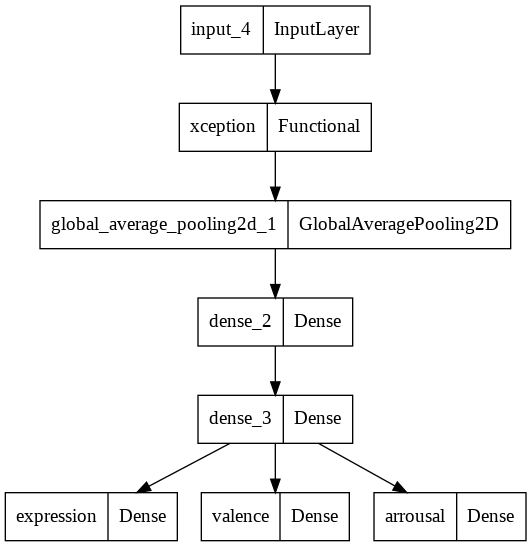

In [ ]:
# plot model architecture
plot_model(model1, show_shapes=False, to_file='inception.png')

In [ ]:
training=trainer1.train(model1)
print("Training complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/45
41/41 [==============================] - ETA: 0s - loss: 7.7731 - expression_loss: 1.5355 - valence_loss: 0.2798 - arrousal_loss: 0.1021 - expression_cohen_kappa: 0.0141 - valence_root_mean_squared_error: 0.5289 - arrousal_root_mean_squared_error: 0.3195
Epoch 1: saving model to /content/gdrive/MyDrive/CV/This/best_model1.h5
41/41 [==============================] - 121s 3s/step - loss: 7.7731 - expression_loss: 1.5355 - valence_loss: 0.2798 - arrousal_loss: 0.1021 - expression_cohen_kappa: 0.0141 - valence_root_mean_squared_error: 0.5289 - arrousal_root_mean_squared_error: 0.3195 - val_loss: 7.9429 - val_expression_loss: 1.5690 - val_valence_loss: 0.2859 - val_arrousal_loss: 0.1057 - val_expression_cohen_kappa: 0.0000e+00 - val_valence_root_mean_squared_error: 0.5347 - val_arrousal_root_mean_squared_error: 0.3251
Epoch 2/45
41/41 [==============================] - ETA: 0s - loss: 7.5118 - expression_loss: 1.4841 - valence_loss: 0.2685 - arrousal_loss: 0.0960 - expression_coh

##**Baseline Evaluation Functions**

In [ ]:
# list all data in history
print(training.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


In [ ]:
def loss_plot(training):
  # summarize history for accuracy
  #plt.plot(training.history['sparse_categorical_accuracy'], label='Äccuracy')
  #plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
  #plt.title('model accuracy')
  #plt.ylabel('accuracy')
  #plt.xlabel('epoch')
  #plt.legend()
  #plt.show()
  # summarize history for loss
  #steps=5
  plt.plot(training.history['loss'], label="Loss")
  plt.plot(training.history['val_loss'], label="Validation loss")
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

In [ ]:
def f1_Score(generators, dfall, model):
  # predicting on the model for f1-score
  steps=5
  # retrieve the expression valance and arousal 
  expression, valance, arosual = model.predict_generator(generators.val_generator, steps=steps)
  y_pred = np.argmax(expression, axis=1)
  y_true=dfall['Expression'][:len(y_pred)]   

  print(metrics.classification_report(y_true, y_pred))

In [ ]:
def cohen_kappa(training):
  #For Cohen Kappa
  #steps=5
  plt.plot(training.history['expression_cohen_kappa'], label="cohen_kappa_exp")
  plt.plot(training.history['val_expression_cohen_kappa'], label="cohen_kappa_val")
  plt.title('Cohen Kappa')
  plt.xlabel('Epoch')
  plt.ylabel('expression_cohen_kappa')
  plt.legend()
  plt.show()

In [ ]:
def SAGR(generators,dfall, model):
  # retrieve the expression valance and arousal 
  expression, valance, arosual = model.predict_generator(generators.val_generator, steps=steps)
  y_pred = np.argmax(expression, axis=1)
  y_true=dfall['Expression'][:len(y_pred)]
  return np.mean(np.sign(y_true) == np.sign(y_pred))

In [ ]:
def PCC(y_true, y_pred):
    """
        Evaluates the Pearson Correlation Coefficient.
        Inputs are numpy arrays.
        Corr = Cov(GT, Est)/(std(GT)std(Est))
    """
    return np.corrcoef(y_true, y_pred)[0,1]


def CCC(generators,dfall, model):
    """
        Evaluates the Concordance Correlation Coefficient.
        Inputs are numpy arrays.
    """
    expression, valance, arosual = model.predict_generator(generators.val_generator, steps=steps)
    y_pred = np.argmax(expression, axis=1)
    y_true=dfall['Expression'][:len(y_pred)]
    mean_pred = np.mean(y_pred)
    mean_gt = np.mean(y_true)

    

    std_pred= np.std(y_pred)
    std_gt = np.std(y_true)

    pearson = PCC(y_true, y_pred)
    return 2.0*pearson*std_pred*std_gt/(std_pred**2+std_gt**2+(mean_pred-mean_gt)**2)

##**Quantitaive Evaluation Xception**

In [ ]:
SAGR(generators, dfall, model1)

0.640625

In [ ]:
CCC(generators,dfall, model1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


-0.04114793881614859

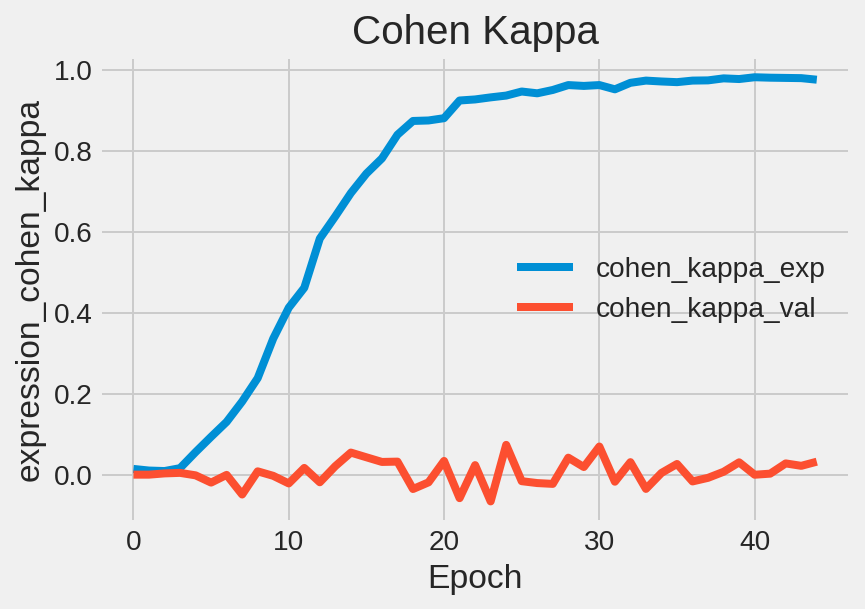

In [ ]:
cohen_kappa(training)

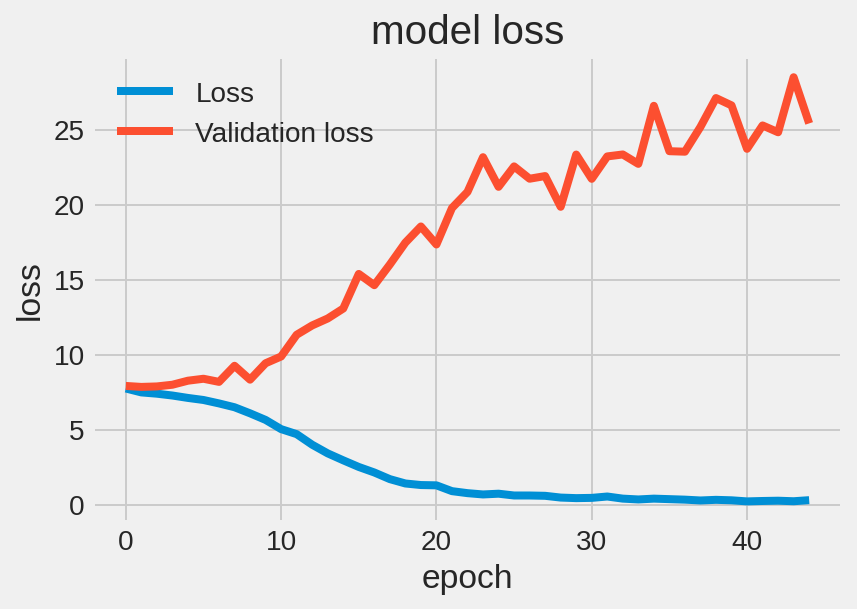

In [ ]:
loss_plot(training)

In [ ]:
f1_Score(generators, dfall, model1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.32      0.27      0.29        82
         1.0       0.41      0.60      0.49       134
         2.0       0.04      0.03      0.04        31
         3.0       0.00      0.00      0.00        24
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         6
         6.0       0.10      0.07      0.08        29
         7.0       0.00      0.00      0.00         5

    accuracy                           0.33       320
   macro avg       0.11      0.12      0.11       320
weighted avg       0.27      0.33      0.29       320



##**Qualitative Predicitions for Xception**

In [ ]:
emotionx, valancex, arosualx = model1.predict_generator(generators.test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Showing correct predictions
{138, 113, 307, 52, 243, 279, 216, 191}


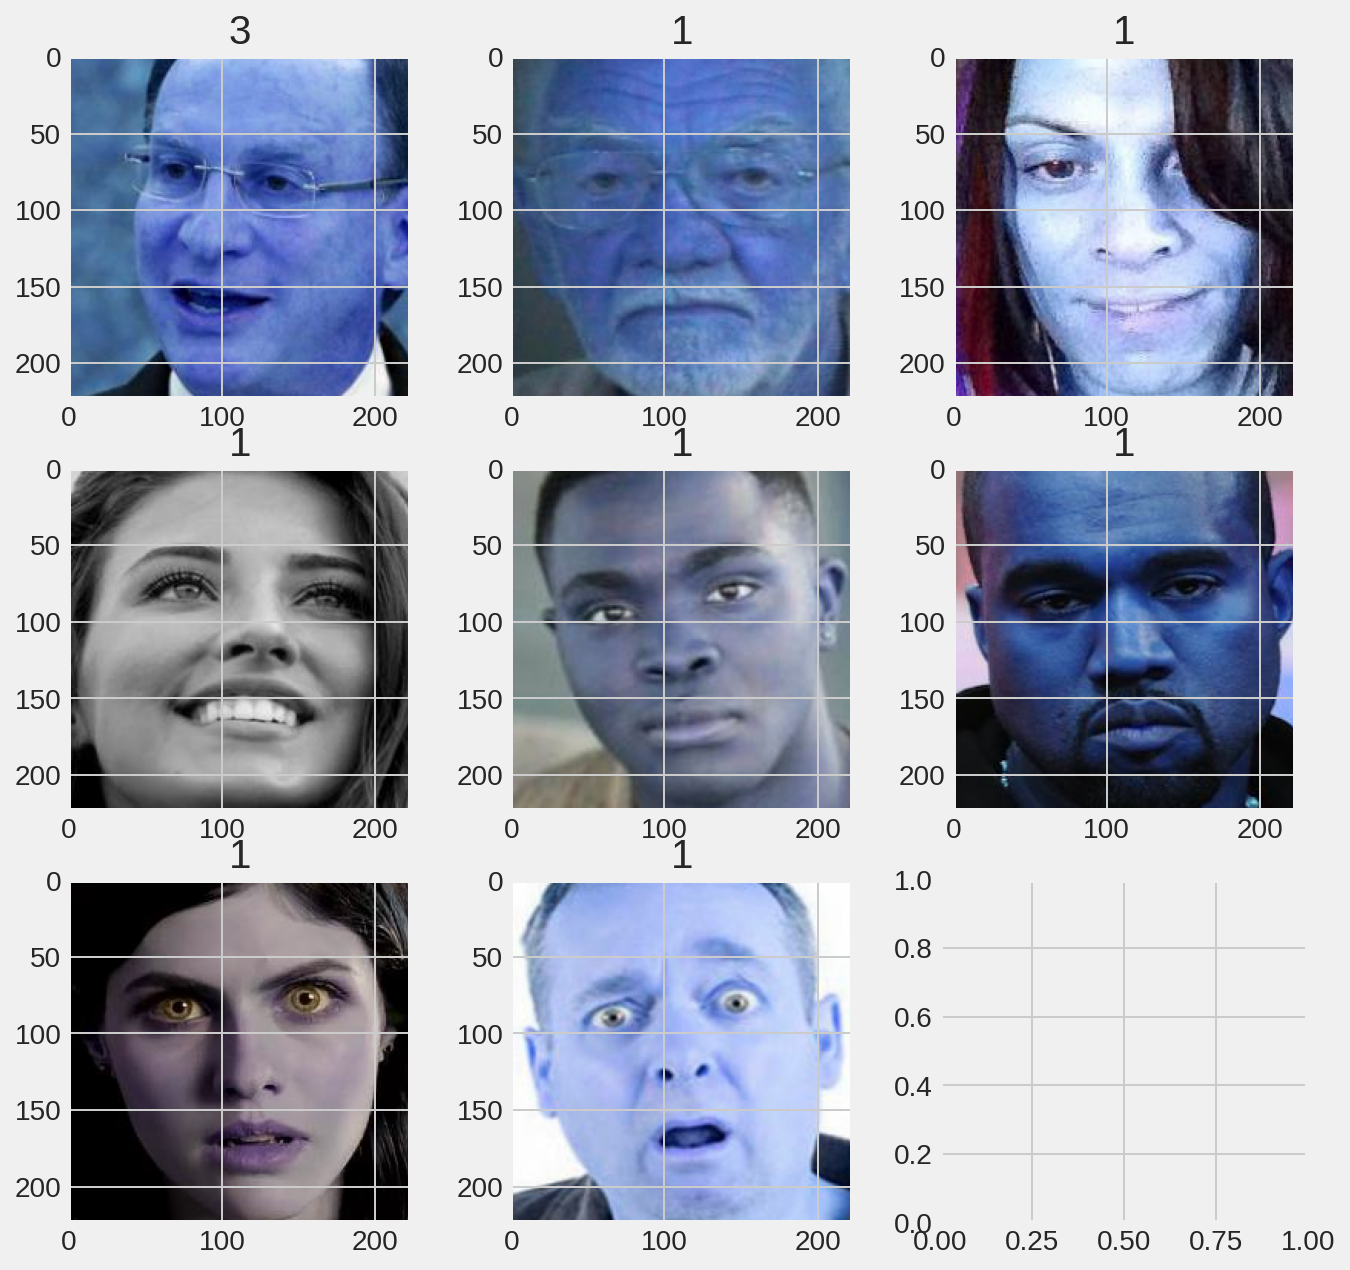

Showing wrong predictions
{99, 197, 79, 336, 18, 19, 275, 148, 185}


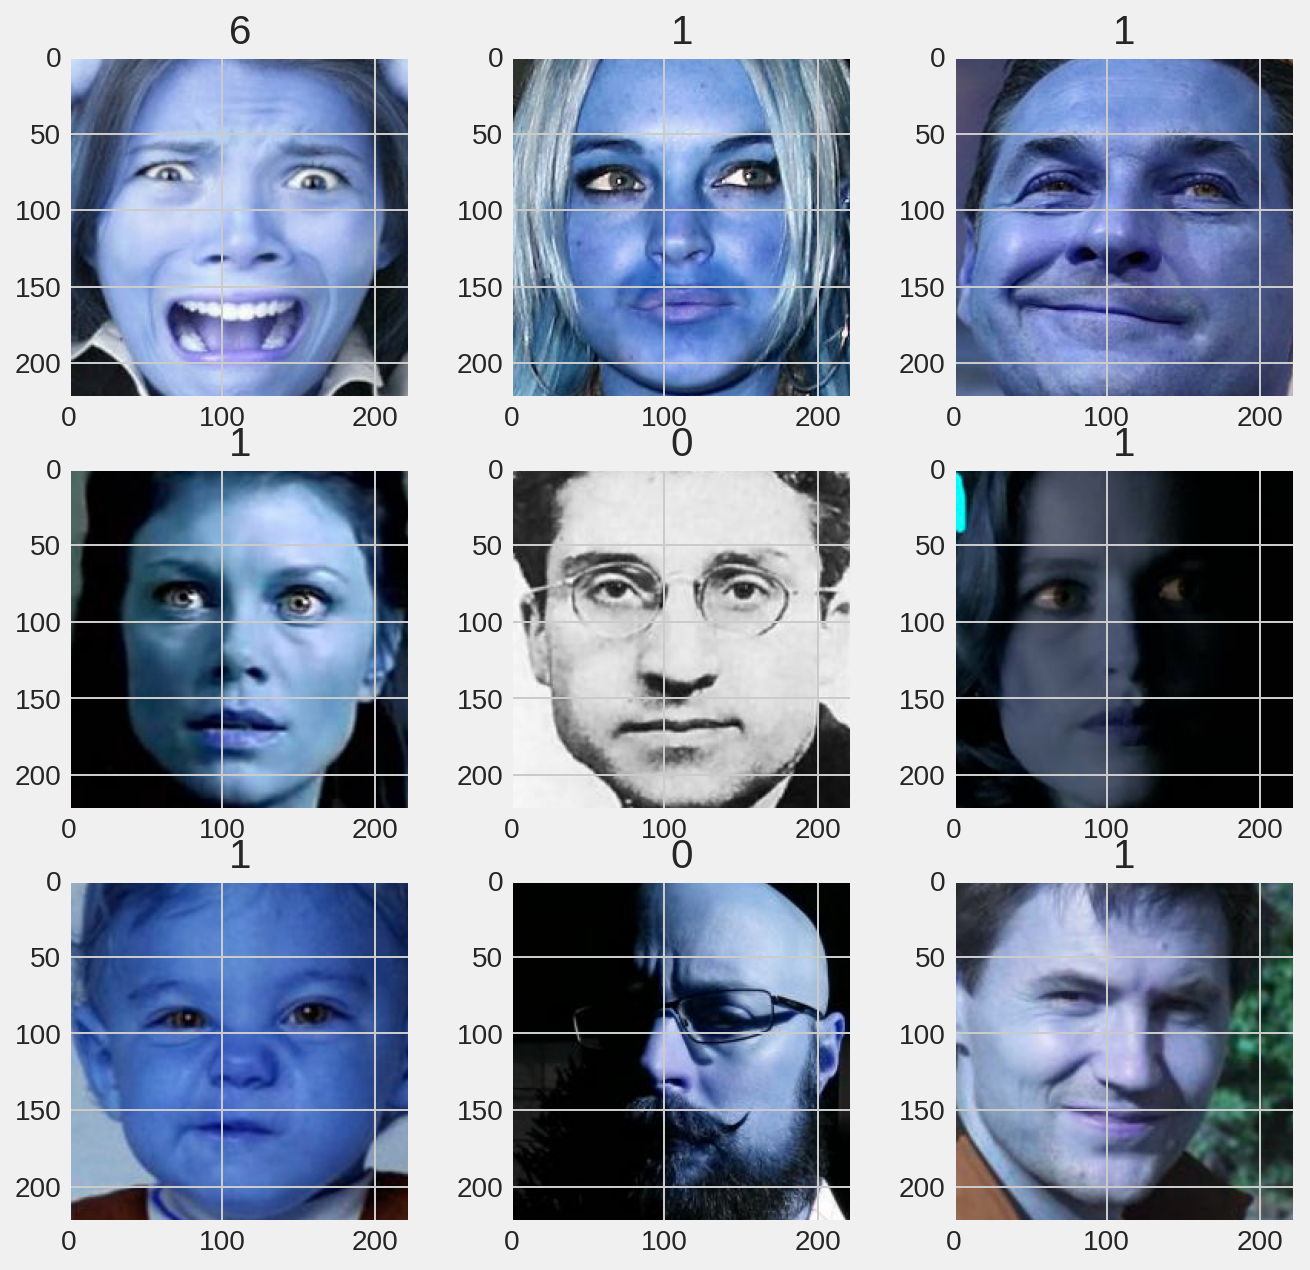

In [ ]:
predictions = np.argmax(emotionx, axis=1)
image_paths = tfall['Image'][:len(predictions)]   
true_class=tfall['Expression'][:len(predictions)]  

#Seperating indices for correctly and incorrectly predicted samples
correct_preds = np.array(true_class) == np.array(predictions)
correct_inds, incorrect_inds = [],[]

for i,x in enumerate(correct_preds):
  if x:
    correct_inds.append(i)
  else:
    incorrect_inds.append(i)

#choose random correct and incorrect samples
correct_inds = set(np.random.choice(correct_inds, size=9))
incorrect_inds = set(np.random.choice(incorrect_inds, size=9))


print("Showing correct predictions")
print(correct_inds)
imgs, labels = [], []
for i,x in enumerate(correct_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
    ax.imshow(img)
    ax.set_title(l)
plt.show()


print("Showing wrong predictions")
print(incorrect_inds)
imgs, labels = [], []
for i,x in enumerate(incorrect_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
   ax.imshow(img)
   ax.set_title(l)
plt.show()

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

##**VGG16 Baseline Training**

In [ ]:
vgg16_base_model = VGG16(weights= 'imagenet', 
                  include_top=False, 
                  input_shape=(224, 224, 3))

# Create and train the model
trainer2 = ModelTrainer(generators)
model2 = trainer2.create_model(vgg16_base_model)
#summarize model
model2.summary()

(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_7 [(None, 224, 224, 3)] float32
vgg16 (None, 224, 224, 3) float32
global_average_pooling2d_2 (None, 7, 7, 512) float32
dense_4 (None, 512) float32
dense_5 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_7[0][0]']       

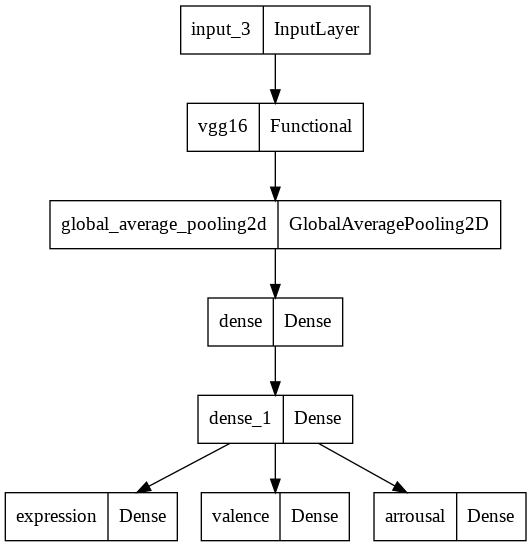

In [ ]:
# plot model architecture
plot_model(model2, show_shapes=False, to_file='vgg16.png')

In [ ]:
training2=trainer2.train(model2)
print("Training complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/45
41/41 [==============================] - ETA: 0s - loss: 8.3368 - expression_loss: 1.6388 - valence_loss: 0.3895 - arrousal_loss: 0.1824 - expression_cohen_kappa: 0.0075 - valence_root_mean_squared_error: 0.6241 - arrousal_root_mean_squared_error: 0.4271
Epoch 1: saving model to /content/gdrive/MyDrive/best_model1.h5
41/41 [==============================] - 115s 2s/step - loss: 8.3368 - expression_loss: 1.6388 - valence_loss: 0.3895 - arrousal_loss: 0.1824 - expression_cohen_kappa: 0.0075 - valence_root_mean_squared_error: 0.6241 - arrousal_root_mean_squared_error: 0.4271 - val_loss: 7.2718 - val_expression_loss: 1.4346 - val_valence_loss: 0.2911 - val_arrousal_loss: 0.1042 - val_expression_cohen_kappa: 0.0000e+00 - val_valence_root_mean_squared_error: 0.5396 - val_arrousal_root_mean_squared_error: 0.3228
Epoch 2/45
41/41 [==============================] - ETA: 0s - loss: 7.7144 - expression_loss: 1.5248 - valence_loss: 0.2658 - arrousal_loss: 0.0947 - expression_cohen_kappa

In [ ]:
# list all data in history
print(training2.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


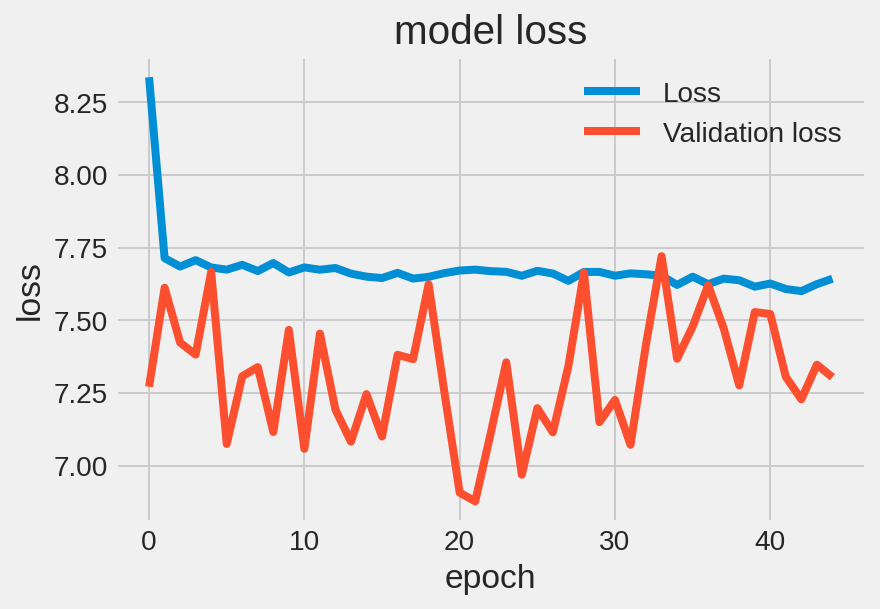

In [ ]:
# summarize history for accuracy
#plt.plot(training.history['sparse_categorical_accuracy'], label='Äccuracy')
#plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend()
#plt.show()
# summarize history for loss
#steps=5
plt.plot(training2.history['loss'], label="Loss")
plt.plot(training2.history['val_loss'], label="Validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# predicting on the model for f1-score
steps=5
# retrieve the expression valance and arousal 
expression2, valance2, arosual2 = model2.predict_generator(generators.val_generator, steps=steps)
y_pred2 = np.argmax(expression2, axis=1)
y_true2=dfall['Expression'][:len(y_pred2)]   

print(metrics.classification_report(y_true2, y_pred2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.48      1.00      0.65       155
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        26
         7.0       0.00      0.00      0.00         2

    accuracy                           0.48       320
   macro avg       0.06      0.12      0.08       320
weighted avg       0.23      0.48      0.32       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


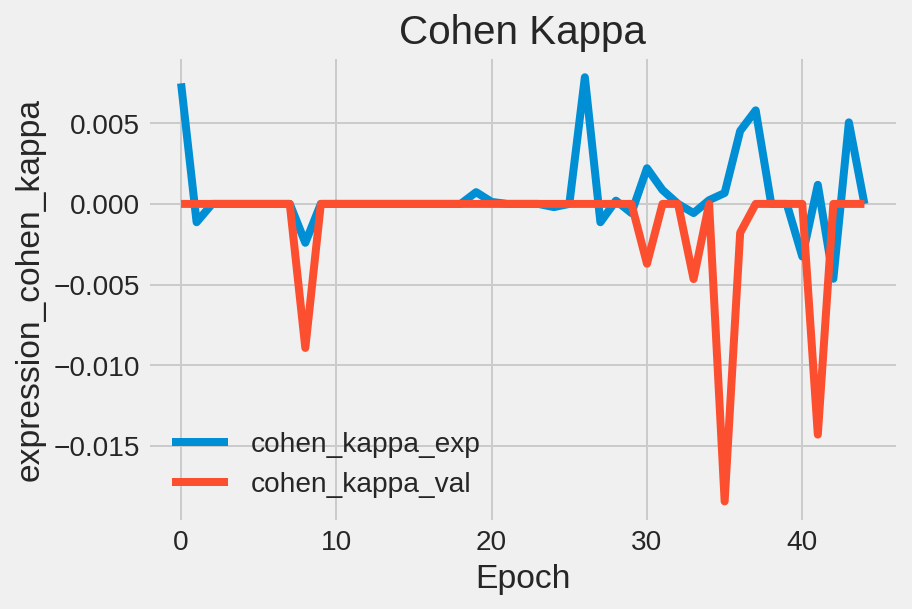

In [ ]:
#For Cohen Kappa
#steps=5
plt.plot(training2.history['expression_cohen_kappa'], label="cohen_kappa_exp")
plt.plot(training2.history['val_expression_cohen_kappa'], label="cohen_kappa_val")
plt.title('Cohen Kappa')
plt.xlabel('Epoch')
plt.ylabel('expression_cohen_kappa')
plt.legend()
plt.show()

In [ ]:
import sklearn.externals
import joblib
joblib.dump(training2, '/content/gdrive/MyDrive/baria/model_Vgg.pkl', compress=1)

INFO:tensorflow:Assets written to: ram://be1b7d4c-1c1a-4fb4-9f55-fb69e7b37621/assets


['/content/gdrive/MyDrive/baria/model_Vgg.pkl']

In [ ]:
mod=joblib.load( '/content/gdrive/MyDrive/baria/model_Vgg.pkl')

In [ ]:
# list all data in history
print(mod.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


In [ ]:
# predicting on the model for f1-score
steps=5
# retrieve the expression valance and arousal 
expression3, valance3, arosual3 = model2.predict_generator(generators.val_generator, steps=steps)
y_pred3 = np.argmax(expression2, axis=1)
y_true3=dfall['Expression'][:len(y_pred3)]   

print(metrics.classification_report(y_true3, y_pred3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.48      1.00      0.65       155
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        26
         7.0       0.00      0.00      0.00         2

    accuracy                           0.48       320
   macro avg       0.06      0.12      0.08       320
weighted avg       0.23      0.48      0.32       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def SAGR(ground_truth, predictions):
    """
        Evaluates the SAGR between estimate and ground truth.
    """
    return np.mean(np.sign(ground_truth) == np.sign(predictions))

In [ ]:
SAGR(y_true3, y_pred3)

0.746875

In [ ]:
import sklearn.externals
import joblib
model4=joblib.load('/content/gdrive/MyDrive/CV/This/model_VGG16.pkl')
train4=joblib.load('/content/gdrive/MyDrive/CV/This/training_VGG16.pkl')

In [ ]:
emotion1, valance1, arosual1 = model4.predict_generator(generators.test_generator)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
CCC(generators,dfall, model4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_di

nan

##**Qualitative Analysis VGG16**

Showing correct predictions
{67, 3, 111, 52, 149, 250, 284, 189, 190}


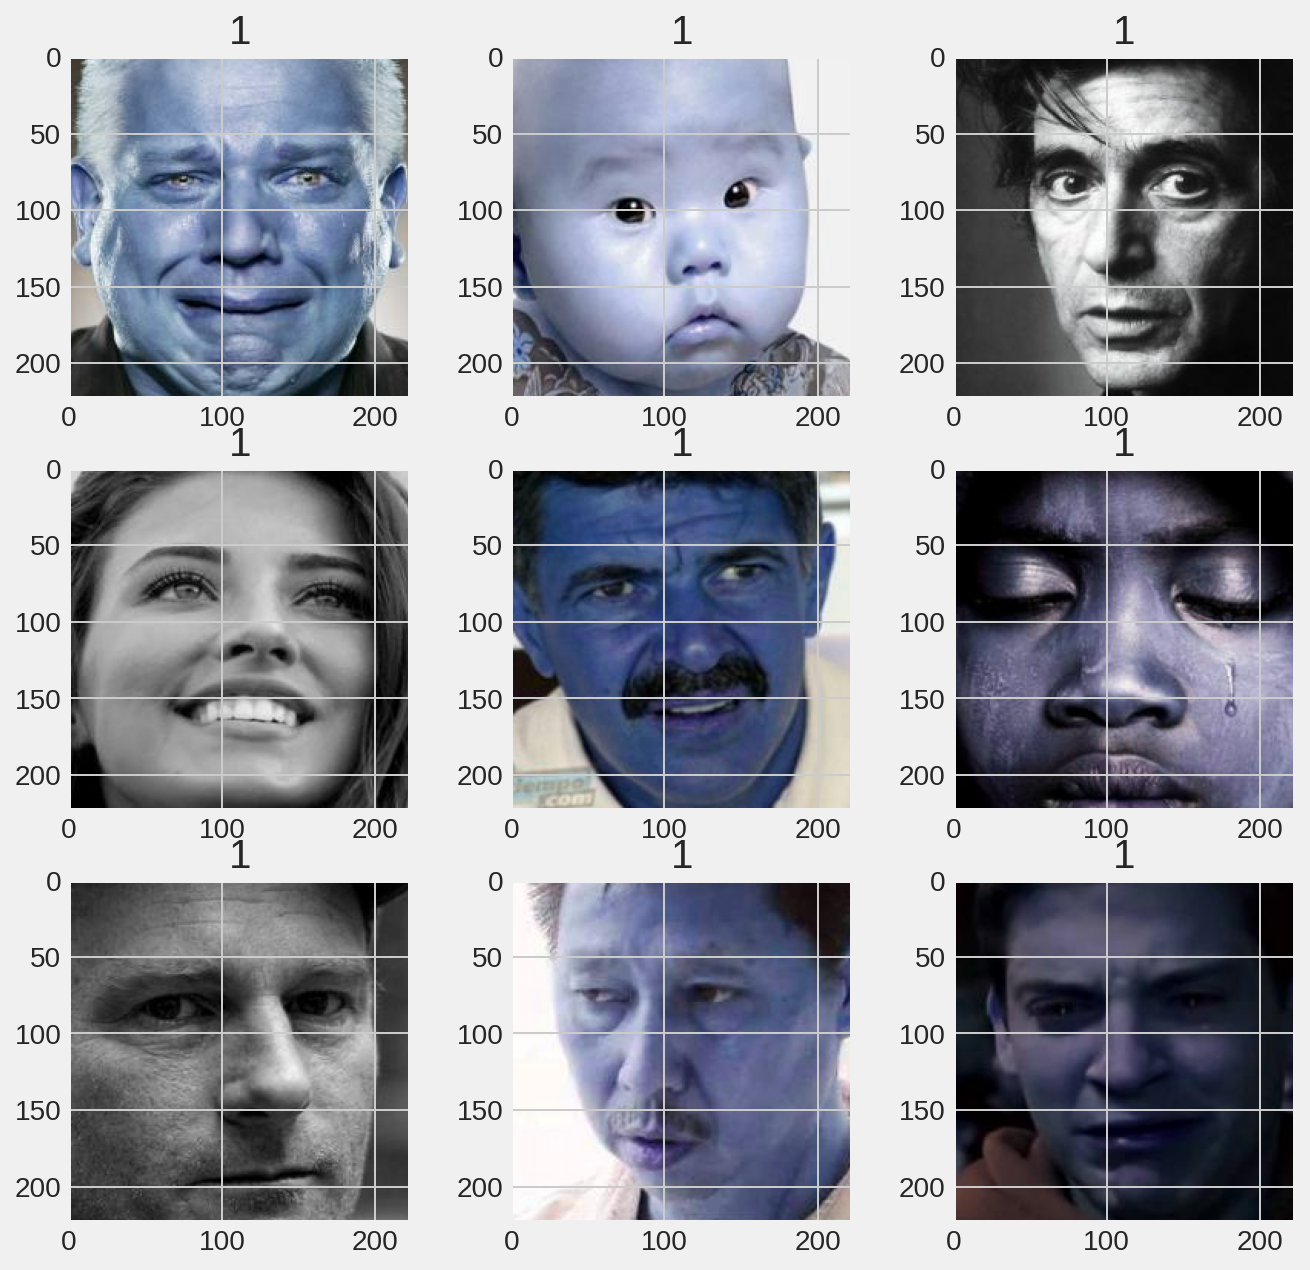

Showing wrong predictions
{0, 71, 201, 140, 300, 19, 340, 119, 346}


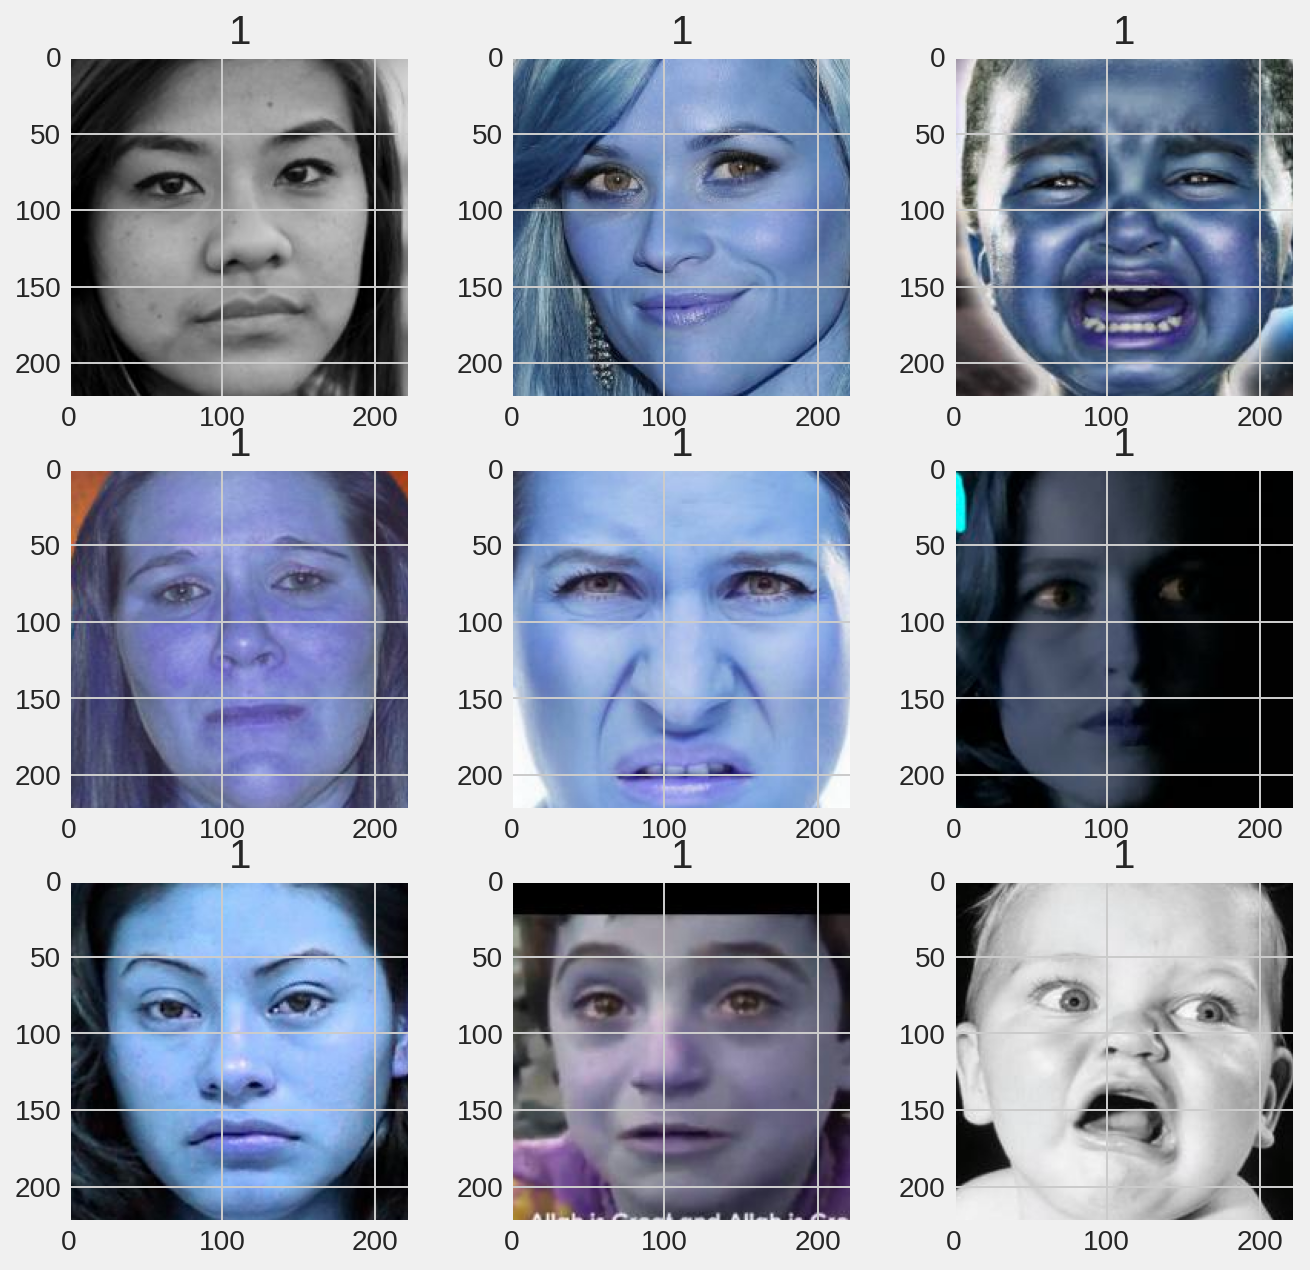

In [ ]:
predictions = np.argmax(emotion1, axis=1)
image_paths = tfall['Image'][:len(predictions)]   
true_class=tfall['Expression'][:len(predictions)]  

#Seperating indices for correctly and incorrectly predicted samples
correct_preds = np.array(true_class) == np.array(predictions)
correct_inds, incorrect_inds = [],[]

for i,x in enumerate(correct_preds):
  if x:
    correct_inds.append(i)
  else:
    incorrect_inds.append(i)

#choose random correct and incorrect samples
correct_inds = set(np.random.choice(correct_inds, size=9))
incorrect_inds = set(np.random.choice(incorrect_inds, size=9))


print("Showing correct predictions")
print(correct_inds)
imgs, labels = [], []
for i,x in enumerate(correct_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
    ax.imshow(img)
    ax.set_title(l)
plt.show()


print("Showing wrong predictions")
print(incorrect_inds)
imgs, labels = [], []
for i,x in enumerate(incorrect_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
   ax.imshow(img)
   ax.set_title(l)
plt.show()